## Name:-Shital Ashok Gaikwad
## Project Name:-Wine Quality

### Import Wine bottle image

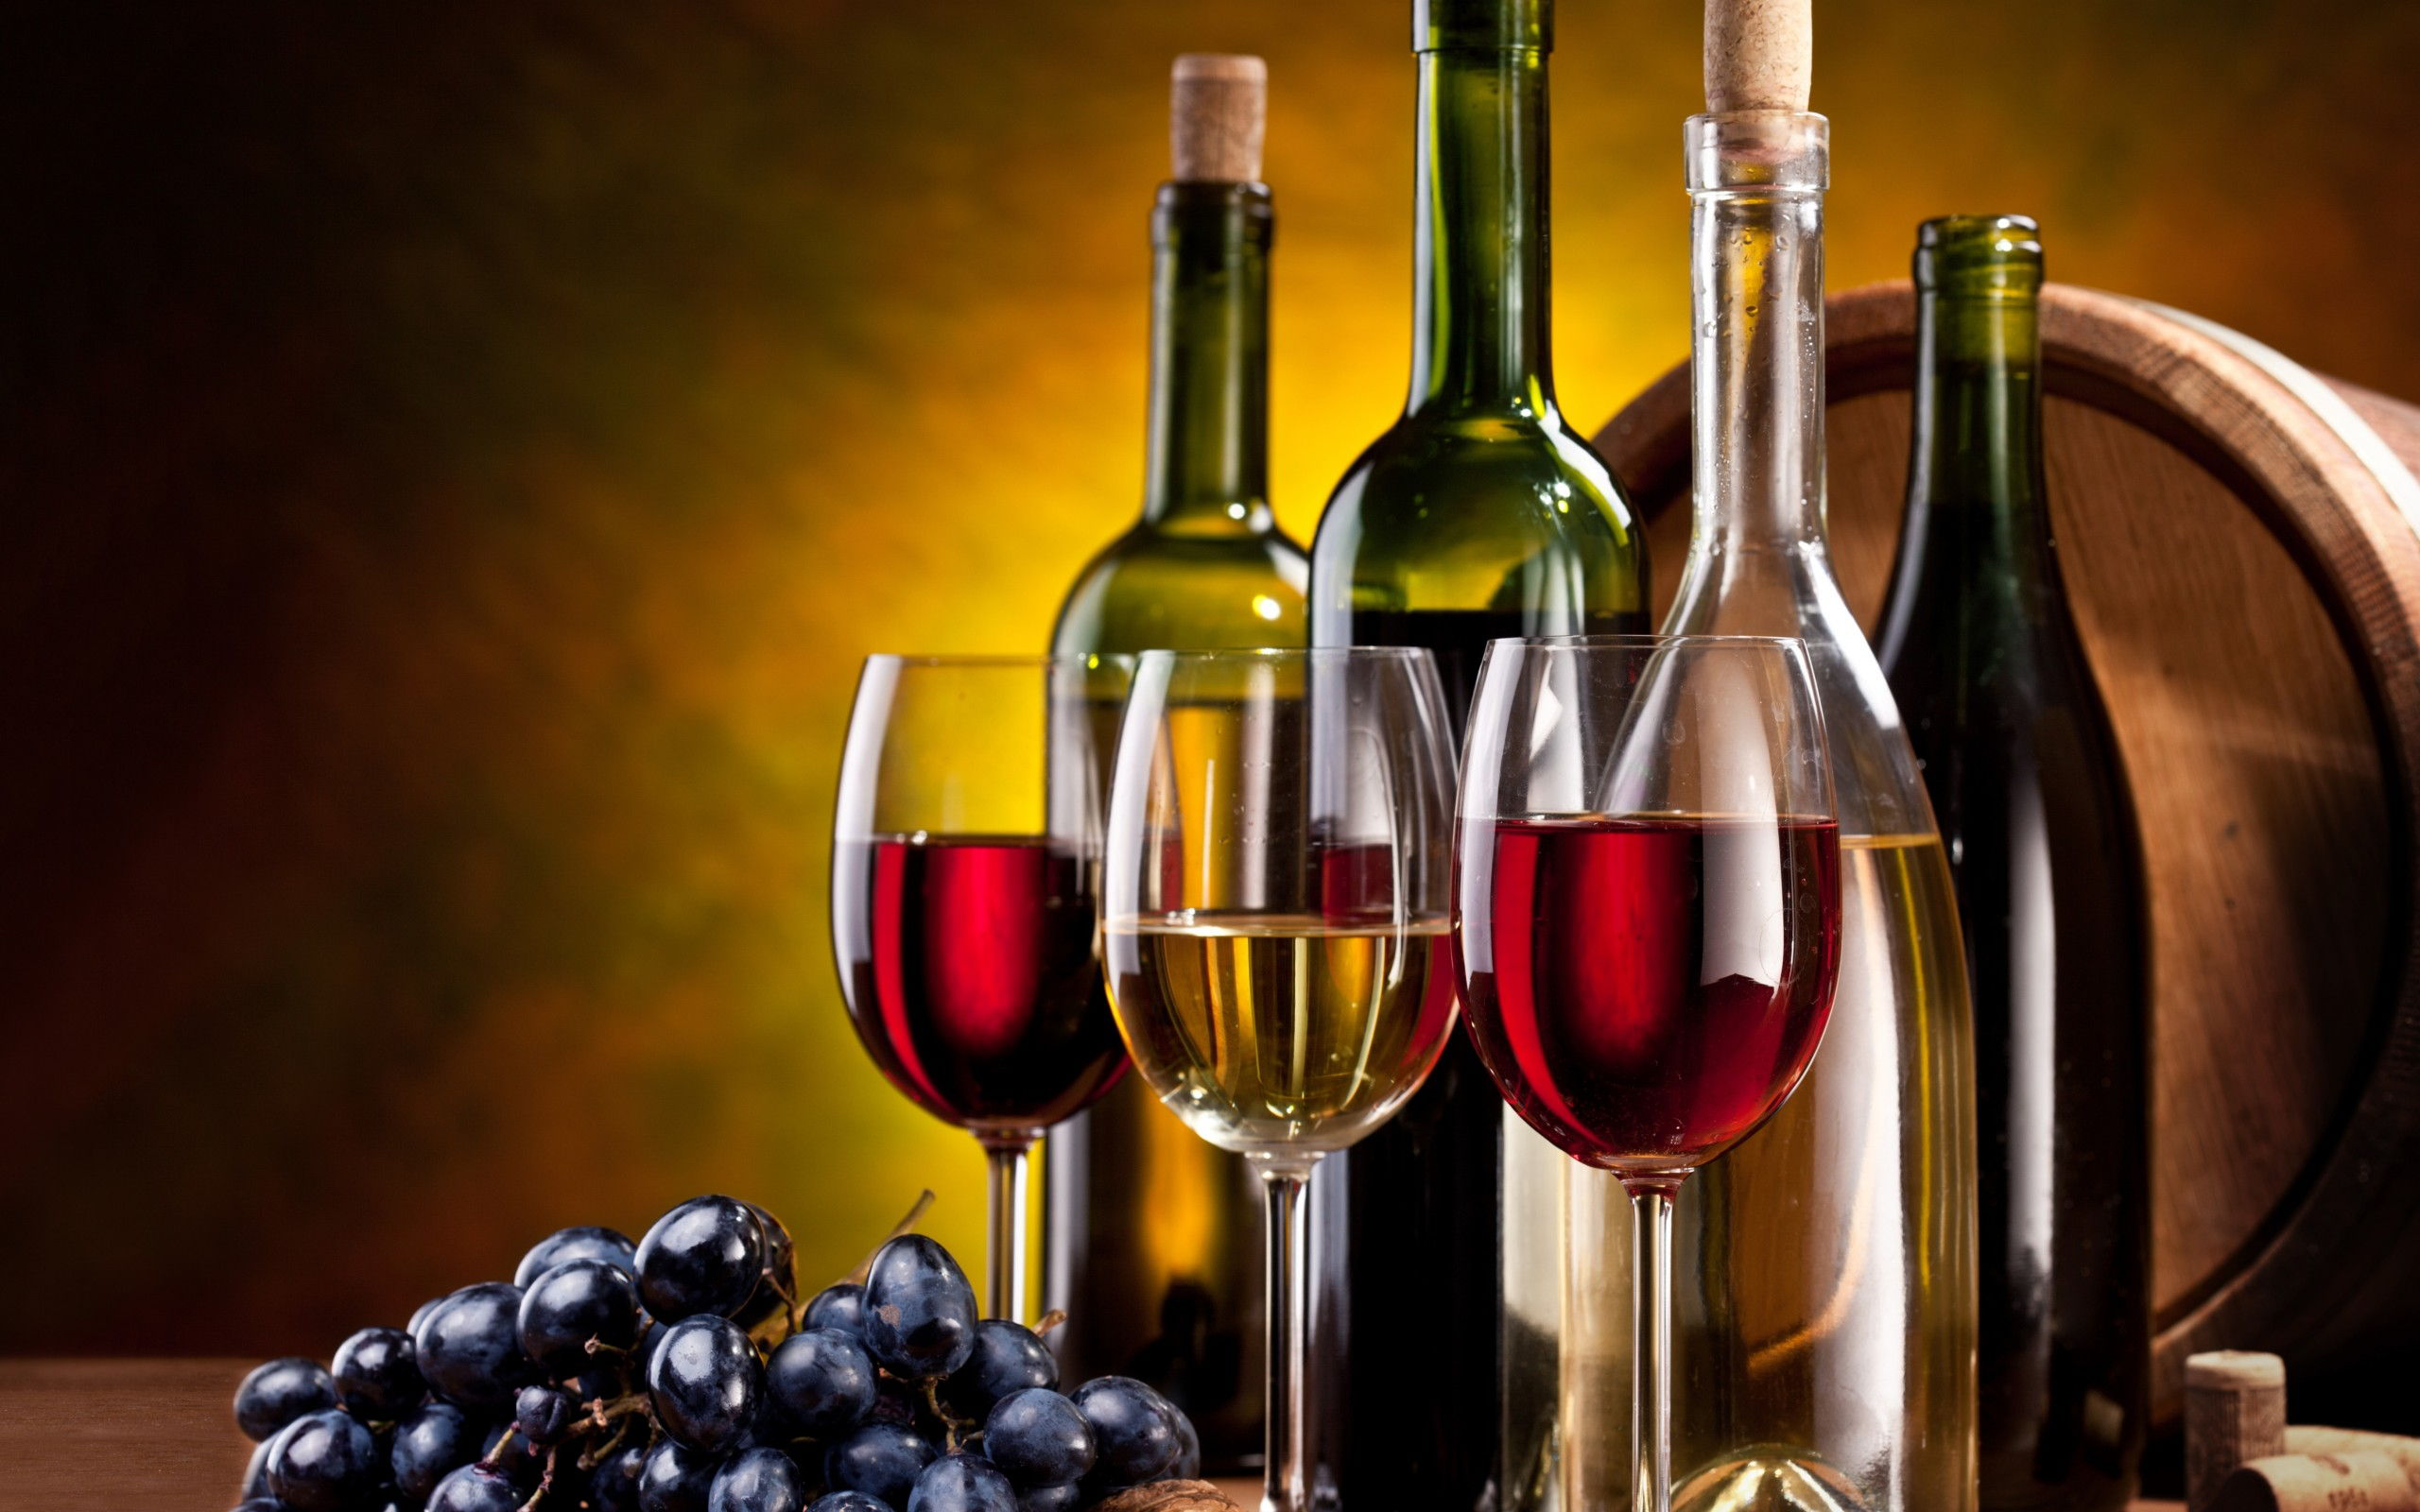

In [1]:
from PIL import Image
Image.open("D:\Datasets\wine_image.jpg")

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from  sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Import Dataset

In [3]:
dataset=pd.read_csv(r"D:\Datasets\winequalityN.csv")
dataset

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
dataset.shape

(6497, 13)

## Data Preprocessing
## Label Encoding

In [6]:
le=LabelEncoder()

In [7]:
dataset["type"]=le.fit_transform(dataset["type"])

## Null Value Handling

In [8]:
#Check there is any null values present in dataset.
dataset.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [9]:
#Check how many null values present in dataset.
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

* Null Value present in above data set.Now we have to fill null value with mean value.

In [10]:
col=dataset.columns
for i in col:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

In [11]:
dataset

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0      0.450000      8.8        6  
1      0.490000      9.5        6  
2      0.440000     10.1        6  
3      0.400000      9.9        6  
4      0.400000      9.9        6  
...         ...      ...      ...  
6492   0.580000     10.5        5  
6493   0.531215     11.2        6  
6494   0.750000     11.0        6  
6495   0.710000     10.2        5  
6496   0.660000     11.0        6  

[6497 rows x 13 columns]

In [12]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Result:-
* There is no Null Values present in the dataset.

## Exploratory Data Analysis (EDA)

In [13]:
#Basic statistical information about dataset.
dataset.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean      0.753886       7.216579          0.339691     0.318722   
std       0.430779       1.295751          0.164548     0.145231   
min       0.000000       3.800000          0.080000     0.000000   
25%       1.000000       6.400000          0.230000     0.250000   
50%       1.000000       7.000000          0.290000     0.310000   
75%       1.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.444326     0.056042            30.525319            115.744574   
std          4.757392     0.035031            17.749400             56.521855   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.994697     3.218395     0.531215    10.491801     5.818378  
std       0.002999     0.160637     0.148768     1.192712     0.873255  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992340     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.996990     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [14]:
# Correlation between each columns of the Dataset.
cor=dataset.corr()
cor

type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.486913         -0.652606     0.187073   
fixed acidity        -0.486913       1.000000          0.219918     0.323349   
volatile acidity     -0.652606       0.219918          1.000000    -0.377759   
citric acid           0.187073       0.323349         -0.377759     1.000000   
residual sugar        0.348982      -0.112219         -0.196578     0.142451   
chlorides            -0.512596       0.298282          0.377122     0.039310   
free sulfur dioxide   0.471644      -0.283237         -0.353055     0.133426   
total sulfur dioxide  0.700357      -0.329409         -0.414706     0.195148   
density              -0.390645       0.458941          0.271107     0.096307   
pH                   -0.328514      -0.251683          0.260283    -0.328354   
sulphates            -0.486662       0.300225          0.225313     0.057564   
alcohol               0.032970      -0.095560         -0.038215    -0.010431   
quality               0.119323      -0.076967         -0.265838     0.085699   

                      residual sugar  chlorides  free sulfur dioxide  \
type                        0.348982  -0.512596             0.471644   
fixed acidity              -0.112219   0.298282            -0.283237   
volatile acidity           -0.196578   0.377122            -0.353055   
citric acid                 0.142451   0.039310             0.133426   
residual sugar              1.000000  -0.128887             0.403242   
chlorides                  -0.128887   1.000000            -0.194978   
free sulfur dioxide         0.403242  -0.194978             1.000000   
total sulfur dioxide        0.495704  -0.279547             0.720934   
density                     0.552487   0.362580             0.025717   
pH                         -0.266717   0.044754            -0.145116   
sulphates                  -0.185716   0.395073            -0.188471   
alcohol                    -0.359656  -0.256844            -0.179838   
quality                    -0.036819  -0.200818             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
type                              0.700357 -0.390645 -0.328514  -0.486662   
fixed acidity                    -0.329409  0.458941 -0.251683   0.300225   
volatile acidity                 -0.414706  0.271107  0.260283   0.225313   
citric acid                       0.195148  0.096307 -0.328354   0.057564   
residual sugar                    0.495704  0.552487 -0.266717  -0.185716   
chlorides                        -0.279547  0.362580  0.044754   0.395073   
free sulfur dioxide               0.720934  0.025717 -0.145116  -0.188471   
total sulfur dioxide              1.000000  0.032395 -0.237523  -0.275291   
density                           0.032395  1.000000  0.011913   0.259432   
pH                               -0.237523  0.011913  1.000000   0.191075   
sulphates                        -0.275291  0.259432  0.191075   1.000000   
alcohol                          -0.265740 -0.686745  0.120939  -0.003261   
quality                          -0.041385 -0.305858  0.019356   0.038713   

                       alcohol   quality  
type                  0.032970  0.119323  
fixed acidity        -0.095560 -0.076967  
volatile acidity     -0.038215 -0.265838  
citric acid          -0.010431  0.085699  
residual sugar       -0.359656 -0.036819  
chlorides            -0.256844 -0.200818  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.120939  0.019356  
sulphates            -0.003261  0.038713  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

Text(0.5, 1.0, 'Heatmap of Correlation of Dataset')

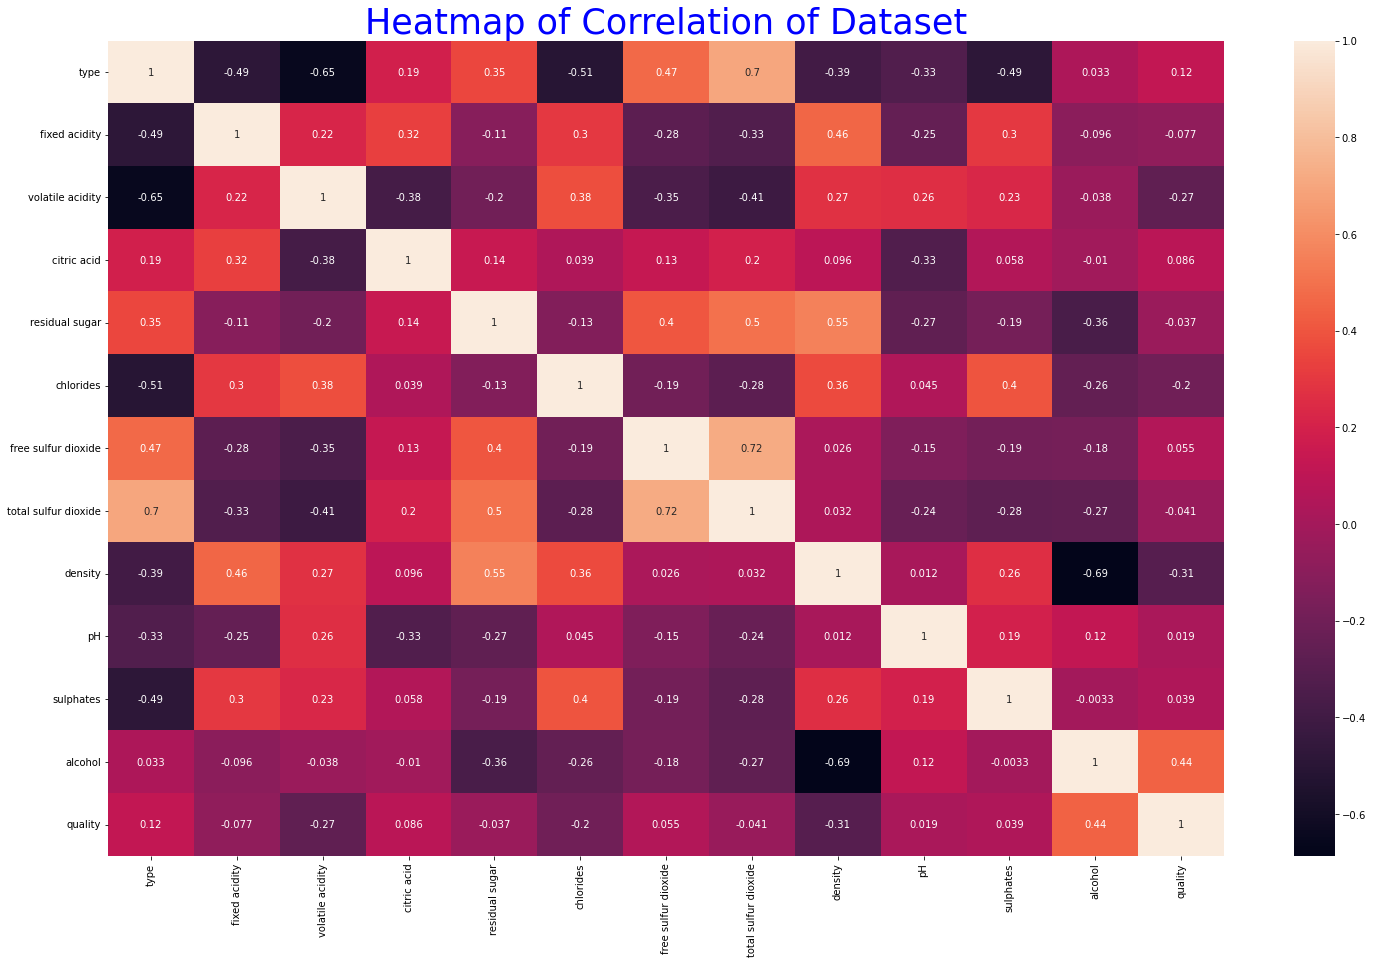

In [15]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True,fmt="0.2g")
plt.title("Heatmap of Correlation of Dataset",fontsize=35,color="blue")

In [16]:
dataset["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


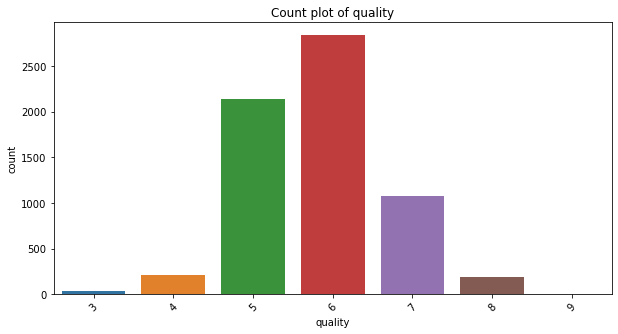

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(dataset["quality"])
plt.title("Count plot of quality")
plt.xticks(rotation=45)
plt.show()

In [18]:
dataset.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

* convert all independent data into one level because in our data set we have same categorical,some
 continous data so we need to convert them into one level.

## Data seperation in independent and dependent data.

In [19]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [20]:
Counter(y)

Counter({6: 2836, 5: 2138, 7: 1079, 8: 193, 4: 216, 3: 30, 9: 5})

# Data Imbalancing Technique (Using Over Sampling SMOTE)

In [21]:
r=RandomOverSampler()
x_data,y_data=r.fit_resample(x,y)

In [22]:
Counter(y_data)

Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})

## Check distribution for each column

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

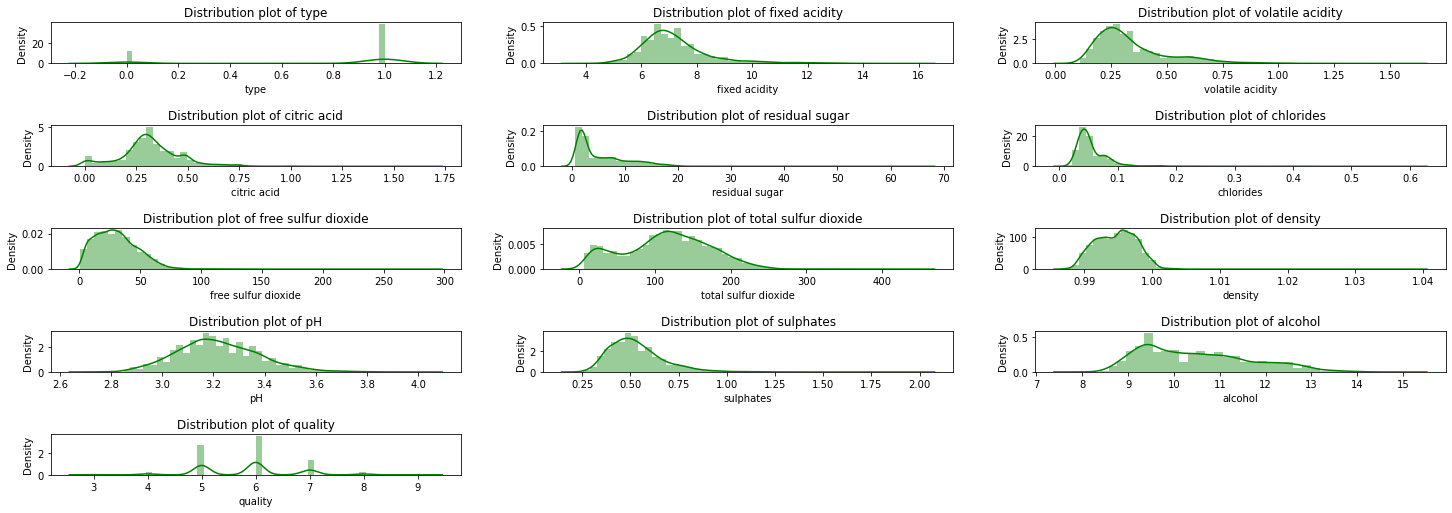

In [23]:
col=dataset.columns
n=0
plt.figure(figsize=(25,14))
for i in col:
    n+=1
    if n<=13:
        plt.subplot(8,3,n)
        plt.subplots_adjust(hspace=1.5,wspace=0.2)
        sns.distplot(dataset[i],color="green")
        plt.title("Distribution plot of {}".format(i))
plt.show()    

### Result:-
* Distribution of the dataset in not normal we need to normalise it.

## Check outliers in independent columns

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_dec

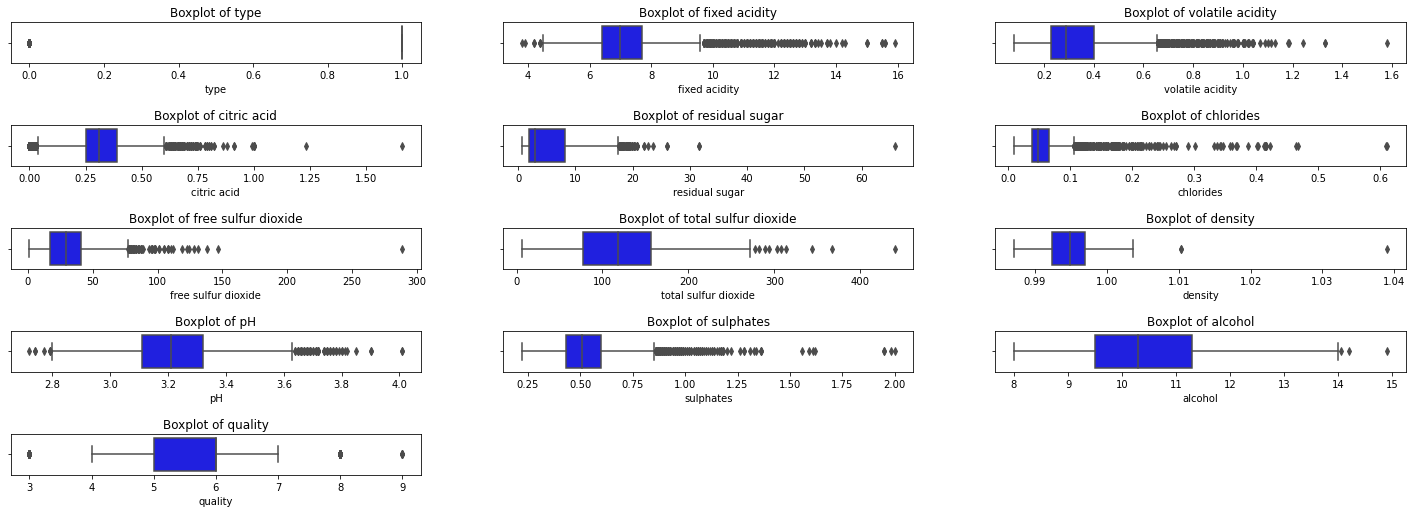

In [24]:
col=dataset.columns
n=0
plt.figure(figsize=(25,14))
for i in col:
    n+=1
    if n<=13:
        plt.subplot(8,3,n)
        plt.subplots_adjust(hspace=1.5,wspace=0.2)
        sns.boxplot(dataset[i],color="blue")
        plt.title("Boxplot of {}".format(i))
plt.show()    

# Remove outliers using Normalization (Min Max Scaler..)

In [25]:
sc= MinMaxScaler()
ind_data=sc.fit_transform(x_data)
Ind_data=pd.DataFrame(ind_data)
Ind_data

0         1         2         3         4         5         6   \
0      1.0  0.264463  0.126667  0.216867  0.308282  0.059801  0.152778   
1      1.0  0.206612  0.146667  0.204819  0.015337  0.066445  0.045139   
2      1.0  0.355372  0.133333  0.240964  0.096626  0.068106  0.100694   
3      1.0  0.280992  0.100000  0.192771  0.121166  0.081395  0.159722   
4      1.0  0.280992  0.100000  0.192771  0.121166  0.081395  0.159722   
...    ...       ...       ...       ...       ...       ...       ...   
19847  1.0  0.297521  0.106667  0.216867  0.021472  0.036545  0.090278   
19848  1.0  0.272727  0.120000  0.295181  0.024540  0.038206  0.104167   
19849  1.0  0.231405  0.186667  0.174699  0.015337  0.019934  0.079861   
19850  1.0  0.272727  0.120000  0.295181  0.024540  0.038206  0.104167   
19851  1.0  0.272727  0.120000  0.295181  0.024540  0.038206  0.104167   

             7         8         9         10        11  
0      0.377880  0.267785  0.217054  0.129213  0.115942  
1      0.290323  0.132832  0.449612  0.151685  0.217391  
2      0.209677  0.154039  0.418605  0.123596  0.304348  
3      0.414747  0.163678  0.364341  0.101124  0.275362  
4      0.414747  0.163678  0.364341  0.101124  0.275362  
...         ...       ...       ...       ...       ...  
19847  0.306452  0.066320  0.434109  0.146067  0.652174  
19848  0.246544  0.061500  0.503876  0.112360  0.710145  
19849  0.182028  0.048969  0.534884  0.219101  0.637681  
19850  0.246544  0.061500  0.503876  0.112360  0.710145  
19851  0.246544  0.061500  0.503876  0.112360  0.710145  

[19852 rows x 12 columns]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(ind_data,y_data,test_size=0.20,random_state=10)

## SVC

In [27]:
svc=SVC()

In [28]:
svc.fit(x_train,y_train)

SVC()

In [29]:
y_pred2=svc.predict(x_test)

In [30]:
ac3=accuracy_score(y_test,y_pred2)*100
print("Accuracy of the  svc classifier is ",ac3,"%")

Accuracy of the  svc classifier is  62.65424326366155 %


In [31]:
cm1=confusion_matrix(y_test,y_pred2)

<AxesSubplot:>

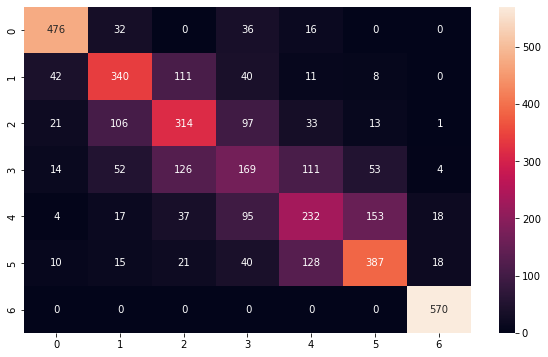

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,fmt="2g")

In [33]:
df1=pd.DataFrame({"Actual":y_test,"predict":y_pred2})
df1

Actual  predict
0          9        9
1          7        8
2          7        7
3          6        5
4          9        9
...      ...      ...
3966       4        4
3967       5        5
3968       9        9
3969       3        3
3970       9        9

[3971 rows x 2 columns]

## Random Forest Classifier

In [34]:
rfc=RandomForestClassifier()

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=rfc.predict(x_test)

In [37]:
y_pred

array([9, 7, 7, ..., 9, 3, 9], dtype=int64)

In [38]:
ac1=accuracy_score(y_test,y_pred)*100
print("Accuracy of the Random Forest Classsifier is ",ac1,"%")

Accuracy of the Random Forest Classsifier is  92.14303701838328 %


In [39]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

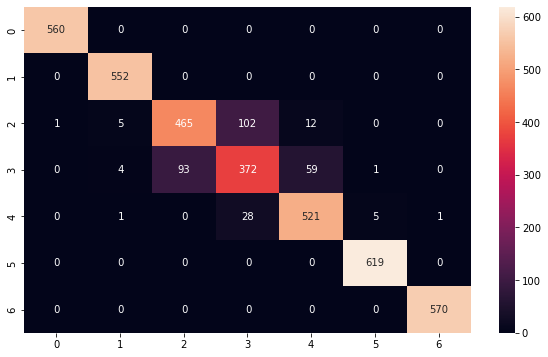

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="2g")

## Comparison of actual value & Predicted value.

In [41]:
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
df

Actual  predict
0          9        9
1          7        7
2          7        7
3          6        6
4          9        9
...      ...      ...
3966       4        4
3967       5        5
3968       9        9
3969       3        3
3970       9        9

[3971 rows x 2 columns]

## Result:-
* When we check the accuracy & errors of the models we can conclude that Random forest Classifier is suitable algorithm for the dataset.